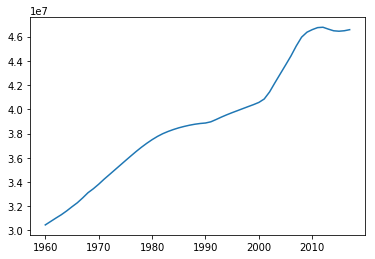

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/ml/pop.csv', sep=',', header=None)
countries = list(df.values[1:,0].flat)
pop_years = list(df.values[0,4:-1].astype("uint16").flat)
pop_numbers = np.nan_to_num(df.values[1:,4:-1].astype("float"))
si = countries.index("Spain")
spain = {}
for y, year in enumerate(pop_years[:-1]):
    pop = pop_numbers[si,y]
    spain[int(year)] = pop
    
plt.plot(pop_years[:-1], pop_numbers[si,:-1])
plt.show()

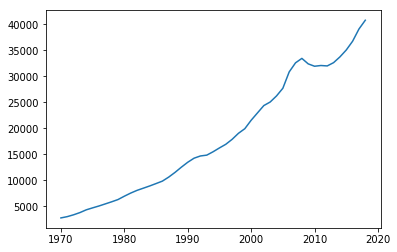

In [2]:
df = pd.read_csv("datasets/ml/spain_gdp.csv", sep=',', header=0)
df = df[df["LOCATION"] == "ESP"]
# per capita
df = df[df["MEASURE"] == "USD_CAP"]
gdp_years = df["TIME"].values.astype("uint16")
gdp_values = df["Value"].values.astype("float")
spain_gdp = dict((int(y), v) for y, v in zip(gdp_years, gdp_values))
plt.plot(list(gdp_years.flat), list(gdp_values.flat))
plt.show()

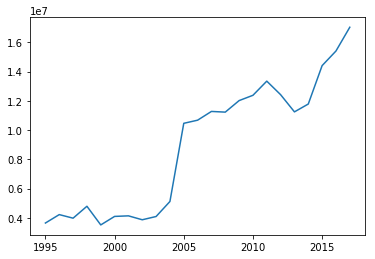

In [3]:
df = pd.read_csv("datasets/ml/tourism.csv", sep=',', header=0)
tour_values = df[df["Country Name"] == "Spain"].values[:,4:].astype("float")
tour_years = range(1960, 2020)
spain_tour = dict((y, v) for y, v in zip(tour_years, tour_values.flat))
plt.plot(tour_years, list(tour_values.flat))
plt.show()

In [4]:
rows = []
for y in range(1996, 2015):
    row = [
            1,                        # bias
            y / 1000,                 # year / 1000
            spain_tour[y] / 1e6,      # tourists, M
            spain[y] / 1e6,           # population, M
            spain_gdp[y] / 1e3,       # GDP per capita, $K
            # spain[y] * spain_gdp[y] / 1e9  # total GDP, $B
    ]
    rows.append(row)
rows = np.matrix(rows)

X = rows[:,:-1]
y = rows[:,-1]

In [15]:
from sklearn.model_selection import train_test_split

# TODO: split data to train and test
# see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = None, None, None, None


# TODO: predict total GDP using linear regression 
# 1) Find regression cofficients
# 2) Find RMSE
# use this to build regression models: https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
# Try LinearRegression, Lasso(alpha=0.05) and Ridge(alpha=0.5)
from sklearn import linear_model

# TODO: find RMSE
# see: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
from sklearn.metrics import mean_squared_error

In [ ]:
# (*) add polynomial features https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html